In [26]:
using JuliaDB, DataFrames, CSV, Gadfly

## IndexedTables

In [27]:
itgap = loadtable("gapminder.csv")
first(itgap, 3)

3-element Vector{NamedTuple{(:country, :continent, :year, :lifeExp, :pop, :gdpPercap), Tuple{String, String, Int64, Float64, Int64, Float64}}}:
 (country = "Afghanistan", continent = "Asia", year = 1952, lifeExp = 28.801, pop = 8425333, gdpPercap = 779.4453145)
 (country = "Afghanistan", continent = "Asia", year = 1957, lifeExp = 30.332, pop = 9240934, gdpPercap = 820.8530296)
 (country = "Afghanistan", continent = "Asia", year = 1962, lifeExp = 31.997, pop = 10267083, gdpPercap = 853.10071)

In [28]:
typeof(itgap)

IndexedTable{StructArrays.StructVector{NamedTuple{(:country, :continent, :year, :lifeExp, :pop, :gdpPercap), Tuple{String, String, Int64, Float64, Int64, Float64}}, NamedTuple{(:country, :continent, :year, :lifeExp, :pop, :gdpPercap), Tuple{WeakRefStrings.StringVector{String}, WeakRefStrings.StringVector{String}, Vector{Int64}, Vector{Float64}, Vector{Int64}, Vector{Float64}}}, Int64}}

In [29]:
itgap[1]

(country = "Afghanistan", continent = "Asia", year = 1952, lifeExp = 28.801, pop = 8425333, gdpPercap = 779.4453145)

In [30]:
itgap[end]

(country = "Zimbabwe", continent = "Africa", year = 2007, lifeExp = 43.487, pop = 12311143, gdpPercap = 469.7092981)

## [columns()](https://juliadb.juliadata.org/stable/api/#IndexedTables.columns)

In [31]:
country = columns(itgap, :country)
continent = columns(itgap, :continent)
year = columns(itgap, :year)
lifeExp = columns(itgap, :lifeExp)
pop = columns(itgap, :pop)
gdp = columns(itgap, :gdpPercap)
first(gdp, 3)

3-element Vector{Float64}:
 779.4453145
 820.8530296
 853.10071

## NDSparse

In [32]:
ndsgap = loadndsparse("gapminder.csv")
first(ndsgap, 3)

3-element Vector{NamedTuple{(:country, :continent, :year, :lifeExp, :pop, :gdpPercap), Tuple{String, String, Int64, Float64, Int64, Float64}}}:
 (country = "Afghanistan", continent = "Asia", year = 1952, lifeExp = 28.801, pop = 8425333, gdpPercap = 779.4453145)
 (country = "Afghanistan", continent = "Asia", year = 1957, lifeExp = 30.332, pop = 9240934, gdpPercap = 820.8530296)
 (country = "Afghanistan", continent = "Asia", year = 1962, lifeExp = 31.997, pop = 10267083, gdpPercap = 853.10071)

In [33]:
ndsgap[1]

(country = "Afghanistan", continent = "Asia", year = 1952, lifeExp = 28.801, pop = 8425333, gdpPercap = 779.4453145)

In [34]:
# ndsgap[end] # Error: no method matching lastindex

In [35]:
ndscountry = columns(ndsgap, :country)
first(ndscountry, 3)

3-element WeakRefStrings.StringVector{String}:
 "Afghanistan"
 "Afghanistan"
 "Afghanistan"

## DataFrame

In [36]:
rgapdf = CSV.read("gapminder.csv", DataFrame)
first(rgapdf, 3)

3×6 DataFrame
│ Row │ country     │ continent │ year  │ lifeExp │ pop      │ gdpPercap │
│     │ String      │ String    │ Int64 │ Float64 │ Int64    │ Float64   │
├─────┼─────────────┼───────────┼───────┼─────────┼──────────┼───────────┤
│ 1   │ Afghanistan │ Asia      │ 1952  │ 28.801  │ 8425333  │ 779.445   │
│ 2   │ Afghanistan │ Asia      │ 1957  │ 30.332  │ 9240934  │ 820.853   │
│ 3   │ Afghanistan │ Asia      │ 1962  │ 31.997  │ 10267083 │ 853.101   │

In [37]:
rgapdf[1][1:3]

3-element PooledArrays.PooledVector{String, UInt32, Vector{UInt32}}:
 "Afghanistan"
 "Afghanistan"
 "Afghanistan"

In [38]:
rgapdf[end][1:3]

3-element Vector{Float64}:
 779.4453145
 820.8530296
 853.10071

In [39]:
# dfcountry = columns(rgapdf, :country) # Error: no method matching columns(::DataFrame)

## Create a new table

In [40]:
data = table(1:1704, country, year, gdp, names = [:id, :country, :year, :gdp], pkey = :id)
first(data, 3)

3-element Vector{NamedTuple{(:id, :country, :year, :gdp), Tuple{Int64, String, Int64, Float64}}}:
 (id = 1, country = "Afghanistan", year = 1952, gdp = 779.4453145)
 (id = 2, country = "Afghanistan", year = 1957, gdp = 820.8530296)
 (id = 3, country = "Afghanistan", year = 1962, gdp = 853.10071)

In [41]:
typeof(data) # summary()

IndexedTable{StructArrays.StructVector{NamedTuple{(:id, :country, :year, :gdp), Tuple{Int64, String, Int64, Float64}}, NamedTuple{(:id, :country, :year, :gdp), Tuple{Vector{Int64}, WeakRefStrings.StringVector{String}, Vector{Int64}, Vector{Float64}}}, Int64}}

## [select()](https://juliadb.juliadata.org/stable/basics/#Selectors-1)

In [80]:
# select(data, :id) # Error: select not defined

LoadError: UndefVarError: select not defined

## [filter()](https://juliadb.juliadata.org/stable/tutorial/#Filtering-the-data-1)

<b>United States</b>

In [43]:
us = filter(r -> r.country == "United States" , data)

Table with 12 rows, 4 columns:
id    country          year  gdp
────────────────────────────────────
1609  "United States"  1952  13990.5
1610  "United States"  1957  14847.1
1611  "United States"  1962  16173.1
1612  "United States"  1967  19530.4
1613  "United States"  1972  21806.0
1614  "United States"  1977  24072.6
1615  "United States"  1982  25009.6
1616  "United States"  1987  29884.4
1617  "United States"  1992  32003.9
1618  "United States"  1997  35767.4
1619  "United States"  2002  39097.1
1620  "United States"  2007  42951.7

In [44]:
dfus = DataFrame(us)
first(dfus)

DataFrameRow
│ Row │ id    │ country       │ year  │ gdp     │
│     │ Int64 │ String        │ Int64 │ Float64 │
├─────┼───────┼───────────────┼───────┼─────────┤
│ 1   │ 1609  │ United States │ 1952  │ 13990.5 │

<b>Canada</b>

In [45]:
ca = filter(r -> r.country == "Canada", data)

Table with 12 rows, 4 columns:
id   country   year  gdp
────────────────────────────
241  "Canada"  1952  11367.2
242  "Canada"  1957  12490.0
243  "Canada"  1962  13462.5
244  "Canada"  1967  16076.6
245  "Canada"  1972  18970.6
246  "Canada"  1977  22090.9
247  "Canada"  1982  22898.8
248  "Canada"  1987  26626.5
249  "Canada"  1992  26342.9
250  "Canada"  1997  28954.9
251  "Canada"  2002  33329.0
252  "Canada"  2007  36319.2

In [46]:
dfca = DataFrame(ca)
first(dfca)

DataFrameRow
│ Row │ id    │ country │ year  │ gdp     │
│     │ Int64 │ String  │ Int64 │ Float64 │
├─────┼───────┼─────────┼───────┼─────────┤
│ 1   │ 241   │ Canada  │ 1952  │ 11367.2 │

## Filter multiple items

In [47]:
caus = filter(r -> r.country in ["United States", "Canada"], data)

Table with 24 rows, 4 columns:
id    country          year  gdp
────────────────────────────────────
241   "Canada"         1952  11367.2
242   "Canada"         1957  12490.0
243   "Canada"         1962  13462.5
244   "Canada"         1967  16076.6
245   "Canada"         1972  18970.6
246   "Canada"         1977  22090.9
247   "Canada"         1982  22898.8
248   "Canada"         1987  26626.5
249   "Canada"         1992  26342.9
250   "Canada"         1997  28954.9
251   "Canada"         2002  33329.0
252   "Canada"         2007  36319.2
1609  "United States"  1952  13990.5
1610  "United States"  1957  14847.1
1611  "United States"  1962  16173.1
1612  "United States"  1967  19530.4
1613  "United States"  1972  21806.0
1614  "United States"  1977  24072.6
1615  "United States"  1982  25009.6
1616  "United States"  1987  29884.4
1617  "United States"  1992  32003.9
1618  "United States"  1997  35767.4
1619  "United States"  2002  39097.1
1620  "United States"  2007  42951.7

In [48]:
dfcaus = DataFrame(caus)
first(dfcaus)

DataFrameRow
│ Row │ id    │ country │ year  │ gdp     │
│     │ Int64 │ String  │ Int64 │ Float64 │
├─────┼───────┼─────────┼───────┼─────────┤
│ 1   │ 241   │ Canada  │ 1952  │ 11367.2 │

## Plot: using [Gadfly](http://gadflyjl.org/stable/)

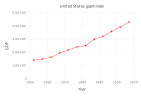

In [23]:
using Gadfly
pusgap = plot(dfus, x = :year, y = :gdp, Guide.title("United States gapminder"), Guide.xlabel("Year"), Guide.ylabel("GDP"), Geom.point, Geom.line, color = [colorant"red"])

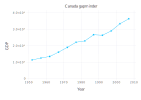

In [24]:
using Gadfly
pcagap = plot(dfca, x = :year, y = :gdp, Guide.title("Canada gapminder"), Guide.xlabel("Year"), Guide.ylabel("GDP"), Geom.point, Geom.line)

## [Layers](http://gadflyjl.org/stable/man/compositing/#Layers)

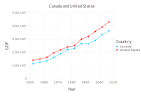

In [82]:
caandus = plot(Guide.title("Canada and United States"), 
    Guide.xlabel("Year"), Guide.ylabel("GDP"),
    Guide.manual_color_key("Country", ["Canada", "United States"],
    [Gadfly.current_theme().default_color, "red"]),
    layer(dfca, x=:year, y=:gdp, Geom.point, Geom.line), 
    layer(dfus, x=:year, y=:gdp, Geom.point, Geom.line, color=[colorant"red"]))

## [Saving as SVG](http://gadflyjl.org/stable/man/backends/#Backends)

In [26]:
pusgap |> SVG("pusgap.svg", 15cm, 10cm)

false

In [27]:
pcagap |> SVG("pcagap.svg", 15cm, 10cm)

false

In [83]:
caandus |> SVG("caandus.svg", 15cm, 10cm)

false